In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Data\CarPrice_Assignment.csv")

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### No Null values.

In [5]:
data_description = pd.read_excel('Data\Data Dictionary - carprices.xlsx')

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [ ]:
data_description=data_description.iloc[3:29,[7,11]]
data_description.columns=['var','desc']

In [ ]:
pd.set_option('display.max_colwidth', -1)
data_description

In [ ]:
data_description['var']=data_description['var'].apply(lambda x:x.strip().lower())

### Checking categorical varaibles and checking if they are perfectly described or not. they shoul be type object and look any data inconsistency

In [6]:
data[['car_ID']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   car_ID  205 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [7]:
data['car_ID'].value_counts().describe()

count    205.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: car_ID, dtype: float64

### carID I will drop as there are 205 differt each with only onc example.

In [8]:
data=data.iloc[:,1:]

In [9]:
data[['symboling']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   symboling  205 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


### symboling need to be changed to category

In [10]:
data[['symboling']]=data[['symboling']].astype('category')

In [11]:
data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [12]:
data_description=data_description.reset_index()

NameError: name 'data_description' is not defined

In [13]:
data_description[data_description['var'] == 'symboling']

NameError: name 'data_description' is not defined

In [14]:
## value associated with -2 very less and no -3

In [15]:
data['CarName'].value_counts()

toyota corona           6
peugeot 504             6
toyota corolla          6
subaru dl               4
toyota mark ii          3
                       ..
plymouth cricket        1
honda civic 1300        1
subaru trezia           1
dodge coronet custom    1
jaguar xj               1
Name: CarName, Length: 147, dtype: int64

### This vaiable will not have good impact on regression as number of categories is very high but obs within category is very low

### Parked for EDA: will brand name is good?

In [16]:
data['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [17]:
data['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

### very low claues for diesel. 

In [18]:
data_description[data_description['var']=='aspiration']

NameError: name 'data_description' is not defined

In [19]:
data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

std works on atmospheric pressure where as turbo A turbocharger, colloquially known as a turbo, is a turbine-driven, forced induction device that increases an internal combustion engine's efficiency and power output by forcing extra compressed air into the combustion chamber

In [20]:
data['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [21]:
data['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [22]:
data['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [23]:
data['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [24]:
data['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

### some categories have  very low values

In [25]:
data[['wheelbase']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   wheelbase  205 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [26]:
data[['carheight']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carheight  205 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [27]:
data[['carwidth']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   carwidth  205 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [28]:
data[['curbweight']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   curbweight  205 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [29]:
data_description['var'].unique()

NameError: name 'data_description' is not defined

In [30]:
data[['enginetype']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   enginetype  205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [31]:
data['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

### rotor and dohcv have very low numbers

In [32]:
data[['cylindernumber']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cylindernumber  205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [33]:
data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [34]:
data[['enginesize']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   enginesize  205 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [35]:
data[['fuelsystem']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   fuelsystem  205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [36]:
data['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [37]:
data.iloc[:,17:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   boreratio         205 non-null    float64
 1   stroke            205 non-null    float64
 2   compressionratio  205 non-null    float64
 3   horsepower        205 non-null    int64  
 4   peakrpm           205 non-null    int64  
 5   citympg           205 non-null    int64  
 6   highwaympg        205 non-null    int64  
 7   price             205 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 12.9 KB


In [38]:
data_numeric=data.select_dtypes(include=[np.number])

In [39]:
data_cat=data.select_dtypes(exclude=[np.number])

In [40]:
data_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


### Analyzing Numerical Varaiables using unvariate plots. checking distribution and looking for outliers.

In [41]:
import seaborn as sns

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

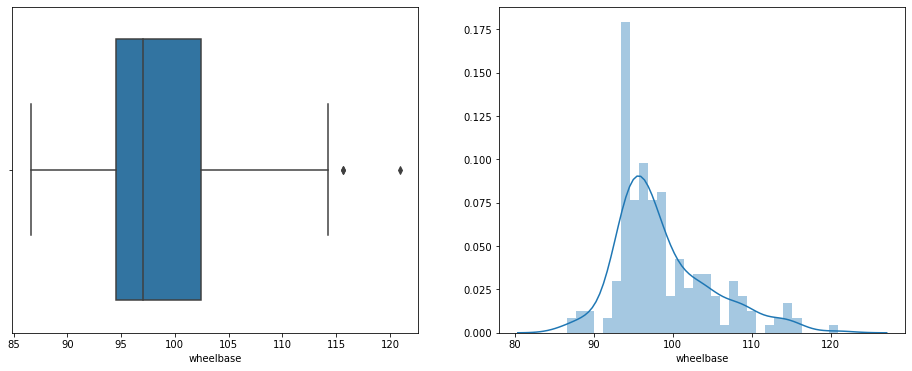

In [43]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['wheelbase'],ax=ax[0])
sns.distplot(data_numeric['wheelbase'],bins=30,ax=ax[1])

plt.show()

In [44]:
data_cat[data['wheelbase']>114]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
70,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,ohc,five,idi
71,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,ohcv,eight,mpfi
73,0,buick century special,gas,std,four,sedan,rwd,front,ohcv,eight,mpfi
109,0,peugeot 504 (sw),gas,std,four,wagon,rwd,front,l,four,mpfi
110,0,peugeot 504,diesel,turbo,four,wagon,rwd,front,l,four,idi
113,0,peugeot 504,gas,std,four,wagon,rwd,front,l,four,mpfi
114,0,peugeot 505s turbo diesel,diesel,turbo,four,wagon,rwd,front,l,four,idi


### nothing spcl about outliers here. Though lets extract company names

In [45]:
data['brandName']=data['CarName'].apply(lambda x:x.split(' ')[0].lower().strip())

In [46]:
data['brandName'].value_counts()

toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
vw              2
renault         2
maxda           2
vokswagen       1
toyouta         1
mercury         1
porcshce        1
Name: brandName, dtype: int64

In [47]:
data.loc[(data['brandName']=='vw' )| (data['brandName']=='vokswagen')|(data['brandName']=='porcshce')|(data['brandName']=='porsche'),'brandName']='volkswagen'

In [48]:
data.loc[(data['brandName']=='toyouta' ),'brandName']='toyota'
 

In [49]:
data['brandName'].value_counts()

toyota         32
nissan         18
volkswagen     17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
maxda           2
renault         2
mercury         1
Name: brandName, dtype: int64

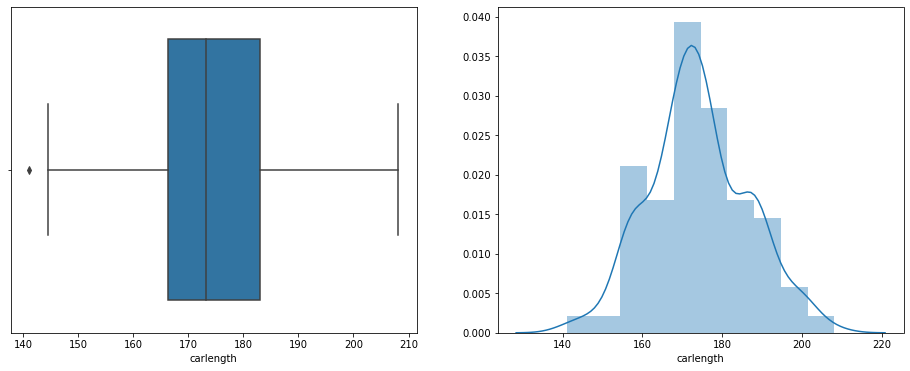

In [50]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['carlength'],ax=ax[0])
sns.distplot(data_numeric['carlength'],bins=10,ax=ax[1])

plt.show()

In [51]:
data_cat[data['carlength']<143]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
18,2,chevrolet impala,gas,std,two,hatchback,fwd,front,l,three,2bbl


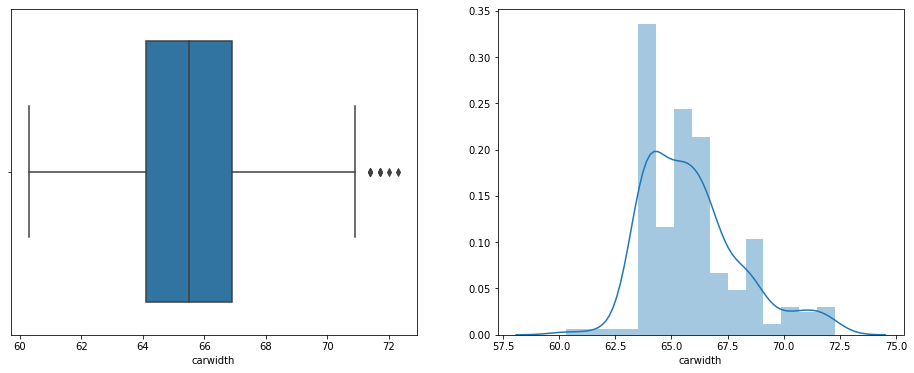

In [52]:

fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['carwidth'],ax=ax[0])
sns.distplot(data_numeric['carwidth'],bins=15,ax=ax[1])

plt.show()

In [53]:
data_cat[data['carwidth']>71]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
6,1,audi 100ls,gas,std,four,sedan,fwd,front,ohc,five,mpfi
7,1,audi 5000,gas,std,four,wagon,fwd,front,ohc,five,mpfi
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
70,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,ohc,five,idi
71,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,ohcv,eight,mpfi
73,0,buick century special,gas,std,four,sedan,rwd,front,ohcv,eight,mpfi
74,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,ohcv,eight,mpfi
129,1,porsche cayenne,gas,std,two,hatchback,rwd,front,dohcv,eight,mpfi


### Luxury Brand are outliers above?

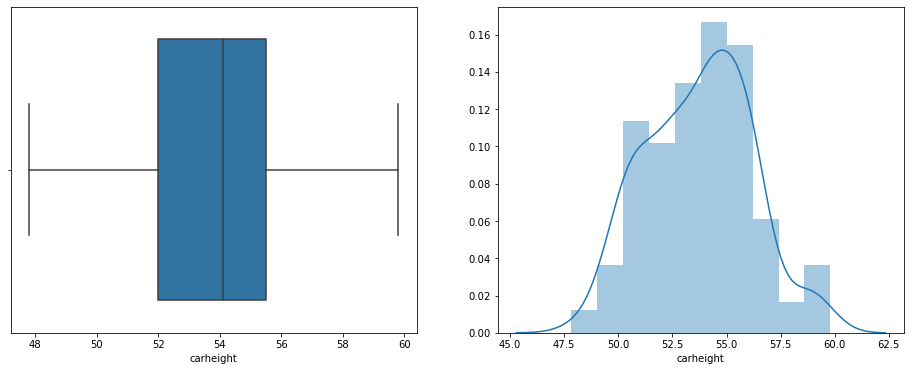

In [54]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['carheight'],ax=ax[0])
sns.distplot(data_numeric['carheight'],bins=10,ax=ax[1])

plt.show()

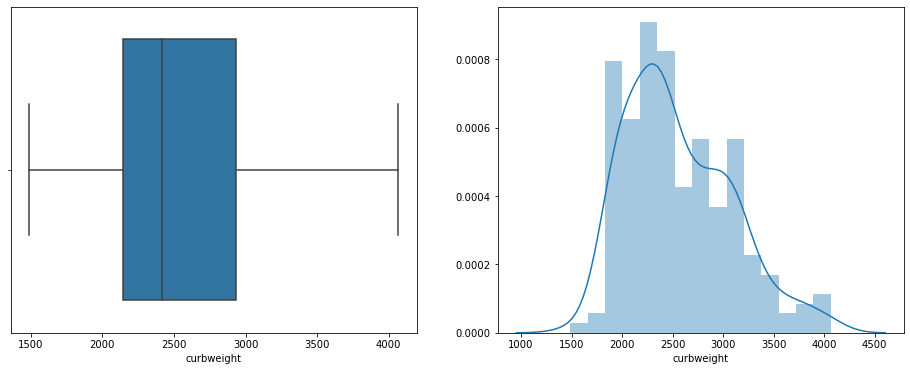

In [55]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['curbweight'],ax=ax[0])
sns.distplot(data_numeric['curbweight'],bins=15,ax=ax[1])

plt.show()

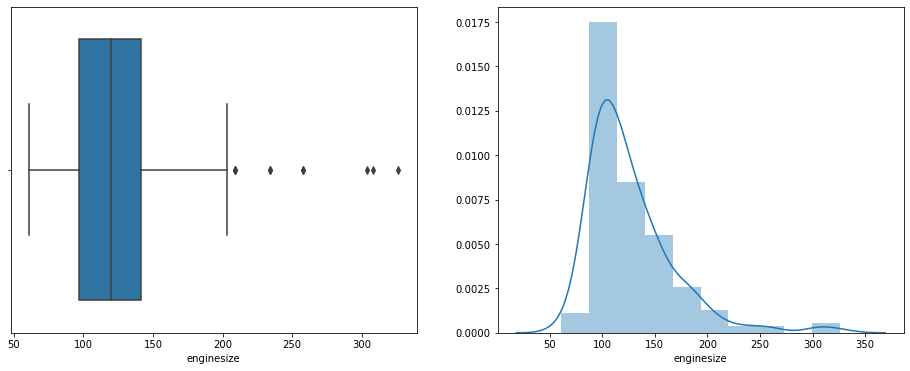

In [56]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['enginesize'],ax=ax[0])
sns.distplot(data_numeric['enginesize'],bins=10,ax=ax[1])

plt.show()

### This feature is more skewed then others. Might need transfrmation in later stages

### outliers seems to be from luxury brands

In [96]:
data[data_numeric['enginesize']>200].sort_values('enginesize')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
129,130,1,porsche cayenne,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5
15,16,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
72,73,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0
47,48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0


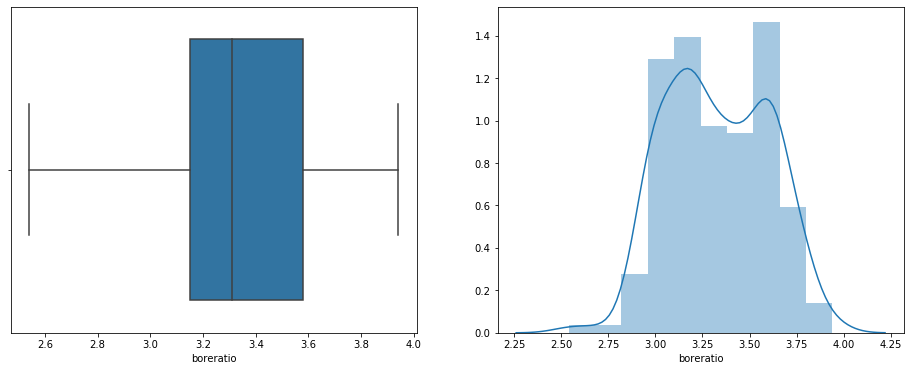

In [58]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['boreratio'],ax=ax[0])
sns.distplot(data_numeric['boreratio'],bins=10,ax=ax[1])

plt.show()

### looks bimodal. check with categorical variables?. will check at bottom of this file

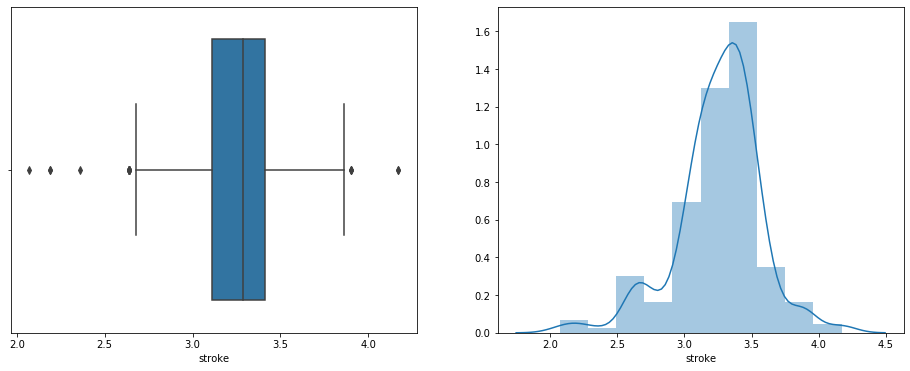

In [59]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['stroke'],ax=ax[0])
sns.distplot(data_numeric['stroke'],bins=10,ax=ax[1])

plt.show()

In [60]:
data_cat[data_numeric['stroke']>3.9]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
47,0,jaguar xj,gas,std,four,sedan,rwd,front,dohc,six,mpfi
48,0,jaguar xf,gas,std,four,sedan,rwd,front,dohc,six,mpfi


In [61]:
data_numeric['stroke'].describe()["25%"]+1.5*(data_numeric['stroke'].describe()["25%"]-data_numeric['stroke'].describe()["75%"])

2.6599999999999993

In [90]:
data[data_numeric['stroke']<2.60].sort_values('stroke')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
134,135,3,saab 99le,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,2.54,2.07,9.3,110,5250,21,28,15040.0
111,112,0,peugeot 504,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,15580.0
113,114,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,16695.0
138,139,2,subaru,gas,std,two,hatchback,fwd,front,93.7,...,97,2bbl,3.62,2.36,9.0,69,4900,31,36,5118.0


### outliers at both end. we will ke an eye for this later stages

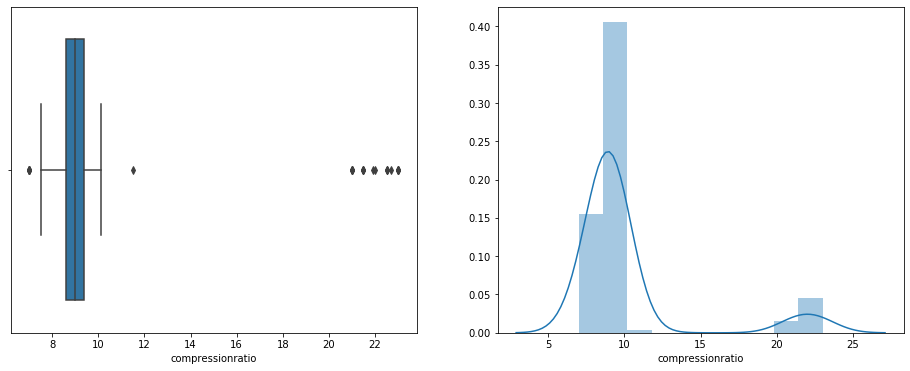

In [63]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric['compressionratio'],ax=ax[0])
sns.distplot(data_numeric['compressionratio'],bins=10,ax=ax[1])

plt.show()

### bimodal beacuse of fuletype

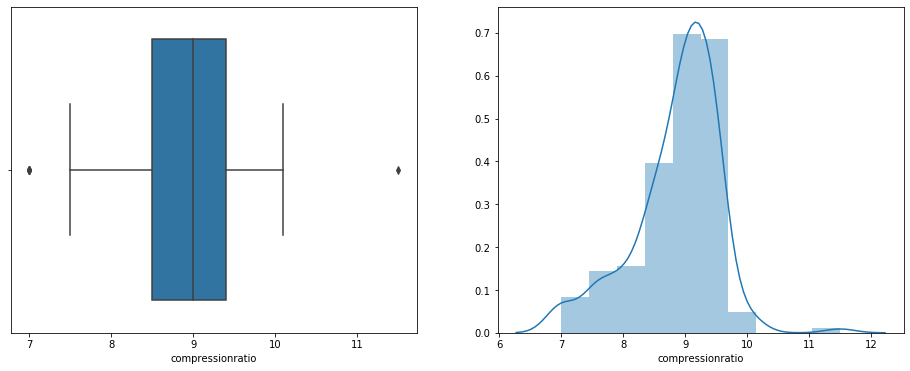

In [64]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[data['fueltype']=='gas','compressionratio'],ax=ax[0])
sns.distplot(data_numeric.loc[data['fueltype']=='gas','compressionratio'],bins=10,ax=ax[1])

plt.show()

In [65]:
data[(data['fueltype']=='gas')&(data['compressionratio']>11)]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brandName
49,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,191.7,...,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0,jaguar


In [66]:
data[(data['fueltype']=='gas')&(data['compressionratio']<=7)]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brandName
9,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,audi
29,3,dodge coronet custom (sw),gas,turbo,two,hatchback,fwd,front,95.9,173.2,...,mfi,3.60,3.90,7.0,145,5000,19,24,12964.000,dodge
82,3,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,95.9,173.2,...,spdi,3.58,3.86,7.0,145,5000,19,24,12629.000,mitsubishi
83,3,mitsubishi g4,gas,turbo,two,hatchback,fwd,front,95.9,173.2,...,spdi,3.59,3.86,7.0,145,5000,19,24,14869.000,mitsubishi
84,3,mitsubishi mirage g4,gas,turbo,two,hatchback,fwd,front,95.9,173.2,...,spdi,3.59,3.86,7.0,145,5000,19,24,14489.000,mitsubishi
117,0,peugeot 604sl,gas,turbo,four,sedan,rwd,front,108.0,186.7,...,mpfi,3.61,3.21,7.0,142,5600,18,24,18150.000,peugeot
124,3,plymouth duster,gas,turbo,two,hatchback,rwd,front,95.9,173.2,...,spdi,3.59,3.86,7.0,145,5000,19,24,12764.000,plymouth


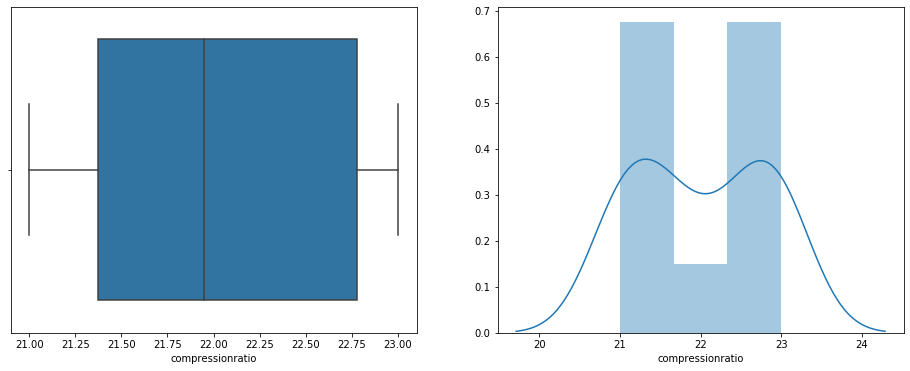

In [67]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[data['fueltype']=='diesel','compressionratio'],ax=ax[0])
sns.distplot(data_numeric.loc[data['fueltype']=='diesel','compressionratio'],bins=3,ax=ax[1])

plt.show()

In [68]:
data_numeric.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

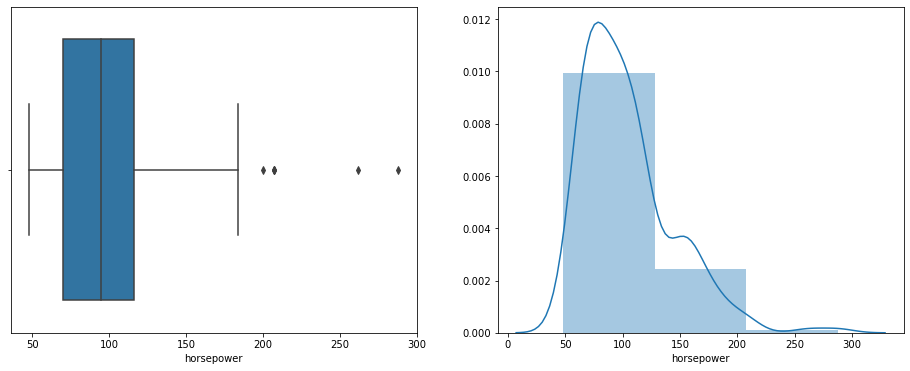

In [69]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[:,'horsepower'],ax=ax[0])
sns.distplot(data_numeric.loc[:,'horsepower'],bins=3,ax=ax[1])

plt.show()

### this also somewhat high skewed

In [70]:
data_numeric['horsepower'].describe()["75%"]-1.5*(data_numeric['horsepower'].describe()["25%"]-data_numeric['horsepower'].describe()["75%"])

185.0

In [71]:
data_cat[data_numeric['horsepower']>185]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
49,0,jaguar xk,gas,std,two,sedan,rwd,front,ohcv,twelve,mpfi
105,3,nissan kicks,gas,turbo,two,hatchback,rwd,front,ohcv,six,mpfi
126,3,porcshce panamera,gas,std,two,hardtop,rwd,rear,ohcf,six,mpfi
127,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,ohcf,six,mpfi
128,3,porsche boxter,gas,std,two,convertible,rwd,rear,ohcf,six,mpfi
129,1,porsche cayenne,gas,std,two,hatchback,rwd,front,dohcv,eight,mpfi


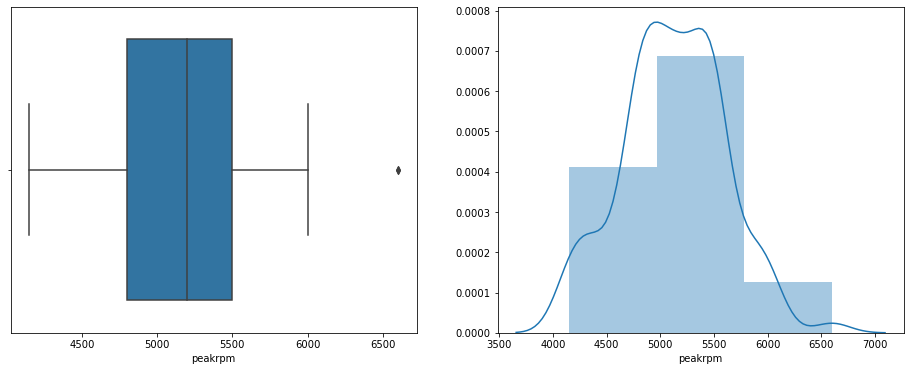

In [72]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[:,'peakrpm'],ax=ax[0])
sns.distplot(data_numeric.loc[:,'peakrpm'],bins=3,ax=ax[1])

plt.show()

In [73]:
data_cat[data_numeric['peakrpm']>6500]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
165,1,toyota celica gt liftback,gas,std,two,sedan,rwd,front,dohc,four,mpfi
166,1,toyota corolla tercel,gas,std,two,hatchback,rwd,front,dohc,four,mpfi


In [95]:
data[(data['price']==18280.00)|(data['price']==41315.00)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
65,66,0,mazda glc,gas,std,four,sedan,rwd,front,104.9,...,140,mpfi,3.76,3.16,8.0,120,5000,19,27,18280.0


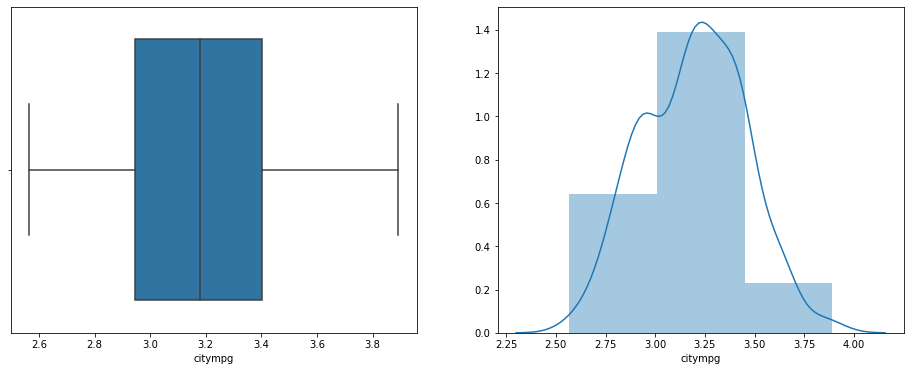

In [74]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(np.log(data_numeric.loc[:,'citympg']),ax=ax[0])
sns.distplot(np.log(data_numeric.loc[:,'citympg']),bins=3,ax=ax[1])

plt.show()

### log of citmpg remove outliers and is more normal

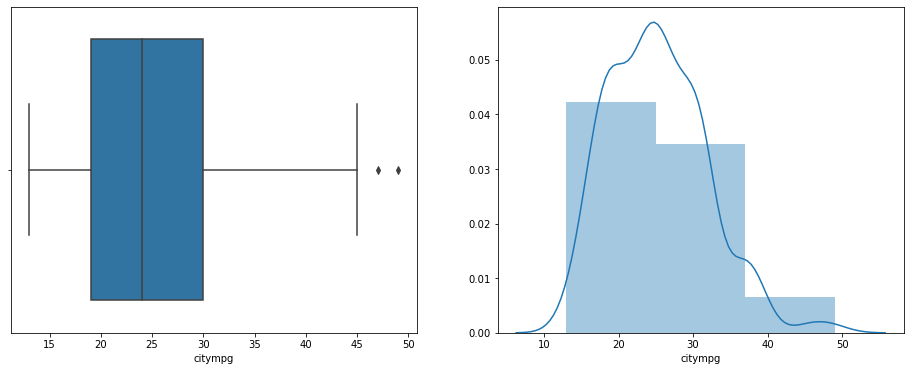

In [75]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[:,'citympg'],ax=ax[0])
sns.distplot(data_numeric.loc[:,'citympg'],bins=3,ax=ax[1])

plt.show()

In [76]:
data_cat[data_numeric['citympg']>45]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
18,2,chevrolet impala,gas,std,two,hatchback,fwd,front,l,three,2bbl
30,2,honda civic,gas,std,two,hatchback,fwd,front,ohc,four,1bbl


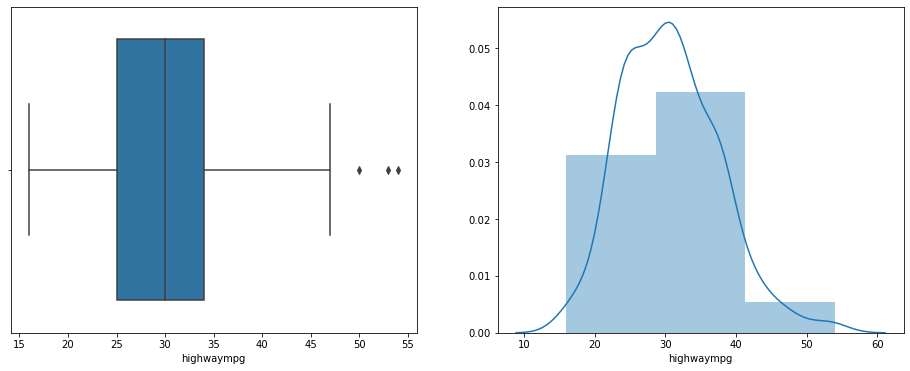

In [77]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[:,'highwaympg'],ax=ax[0])
sns.distplot(data_numeric.loc[:,'highwaympg'],bins=3,ax=ax[1])

plt.show()

In [78]:
data_cat[data_numeric['highwaympg']>47]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
18,2,chevrolet impala,gas,std,two,hatchback,fwd,front,l,three,2bbl
30,2,honda civic,gas,std,two,hatchback,fwd,front,ohc,four,1bbl
90,1,nissan gt-r,diesel,std,two,sedan,fwd,front,ohc,four,idi


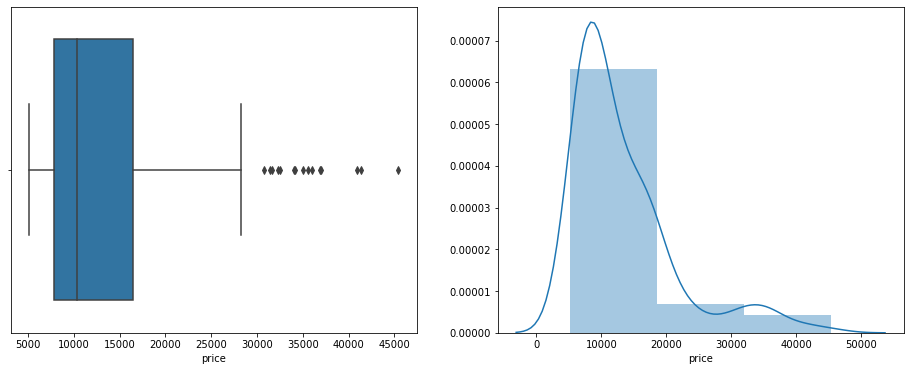

In [79]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 6))
sns.boxplot(data_numeric.loc[:,'price'],ax=ax[0])
sns.distplot(data_numeric.loc[:,'price'],bins=3,ax=ax[1])

plt.show()

In [99]:
data[data_numeric.price>30000]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
15,16,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0
47,48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
70,71,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
72,73,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0


### price is skewed. will check transformation at later stages

In [93]:
data[(data['price']==18280.00)|(data['price']==15040.00)|(data['price']==34184.00)|((data['price']==45400.00)|(data['price']==41315.00))]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
65,66,0,mazda glc,gas,std,four,sedan,rwd,front,104.9,...,140,mpfi,3.76,3.16,8.0,120,5000,19,27,18280.0
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0
134,135,3,saab 99le,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,2.54,2.07,9.3,110,5250,21,28,15040.0


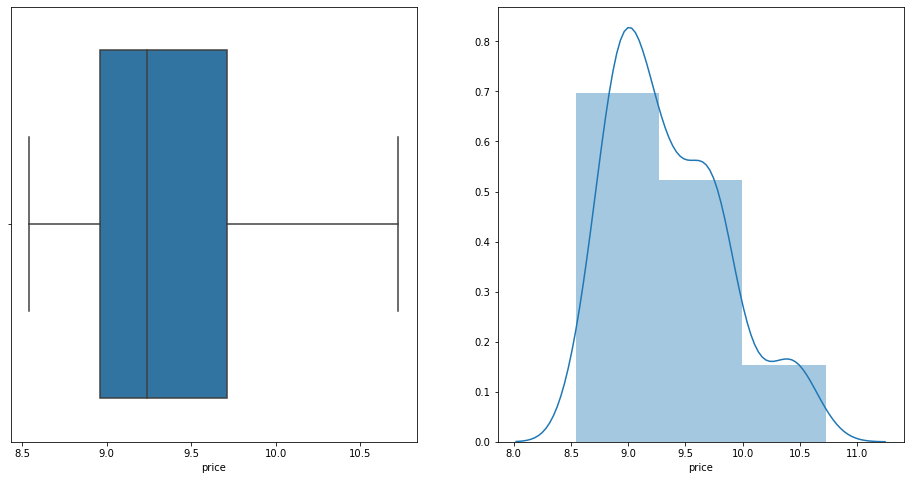

In [80]:
fig,ax = plt.subplots(ncols=2,figsize=(16, 8))
sns.boxplot(np.log(data_numeric.loc[:,'price']),ax=ax[0])
sns.distplot(np.log(data_numeric.loc[:,'price']),bins=3,ax=ax[1])

plt.show()

## cluster analysis in R with gower's distance. for only cluster analysis i will transform varaibles

In [86]:
data = pd.read_csv("Data\CarPrice_Assignment.csv")